In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
car_data = pd.read_csv("datasets/car_data[1].csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']

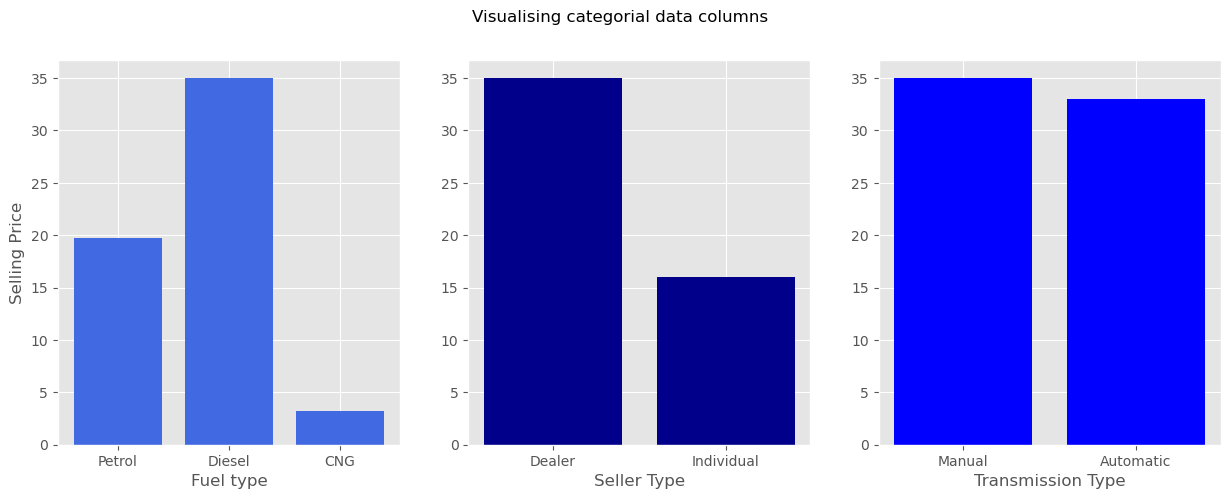

In [9]:
from matplotlib import style
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualising categorial data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price,color='royalblue')
plt.xlabel('Fuel type')
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color='darkblue')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type,selling_price,color='blue')
plt.xlabel('Transmission Type')
plt.show()

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

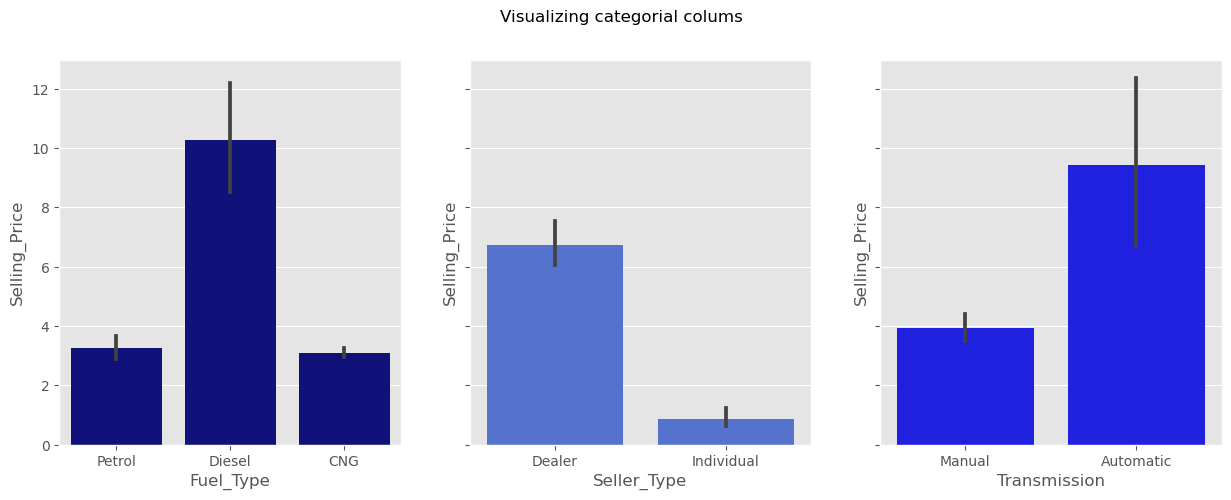

In [31]:
fig, axes=plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing categorial colums')
sns.barplot(x=fuel_type,y=selling_price,ax=axes[0], color='darkblue')
sns.barplot(x=seller_type,y=selling_price,ax=axes[1],color='royalblue')
sns.barplot(x=transmission_type,y=selling_price,ax=axes[2],color='blue')


In [11]:
petrol_data=car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


converting categorical data in numerical data

In [12]:
##manual encoding
#car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)


car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)


In [13]:
##onenotencoding

car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)

In [14]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


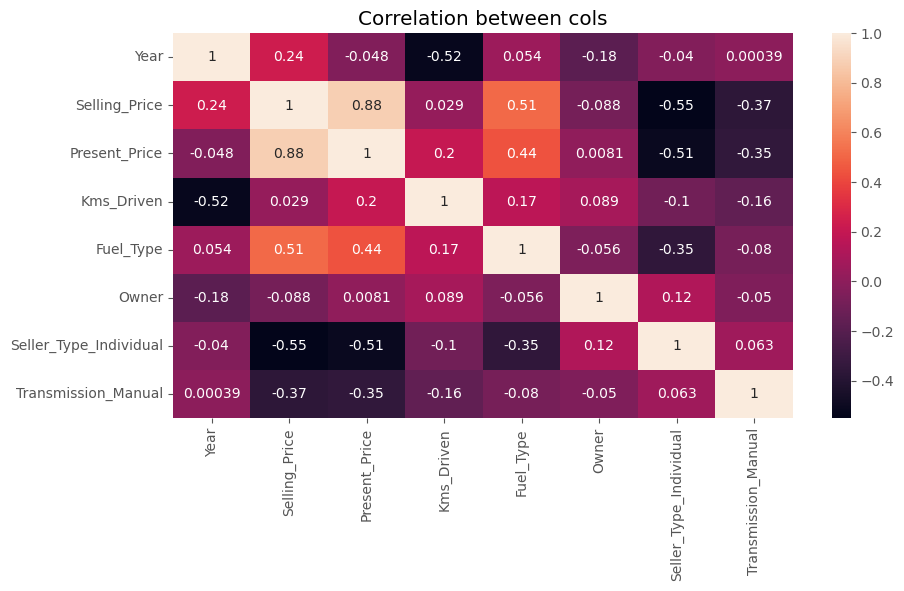

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(car_data.corr(),annot=True,color='red')
plt.title('Correlation between cols')
plt.show()

##regression plot

<AxesSubplot:title={'center':'Corelation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

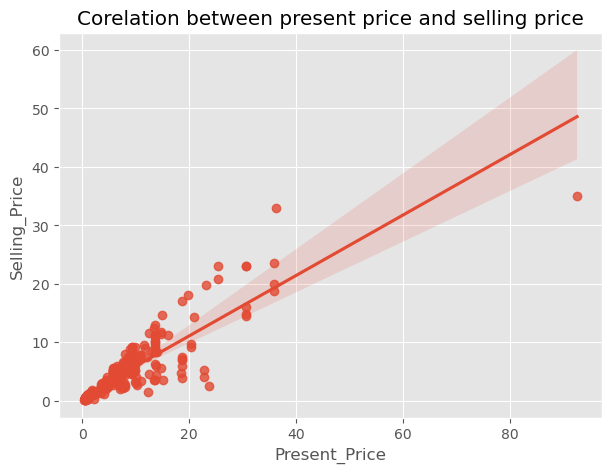

In [16]:
fig=plt.figure(figsize=(7,5))
plt.title('Corelation between present price and selling price')
sns.regplot(x='Present_Price', y=selling_price,data=car_data)

In [17]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [18]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (301, 7)
Shape of y is:  (301,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [20]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)


X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape:  (91,)
y_train shape: (210,)


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train) ## to transform data and fit to scale
X_test = scaler.transform(X_test)

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
pred = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  1.2581404706473371
MSE:  3.4932860262251446
R2 score:  0.829493336977882


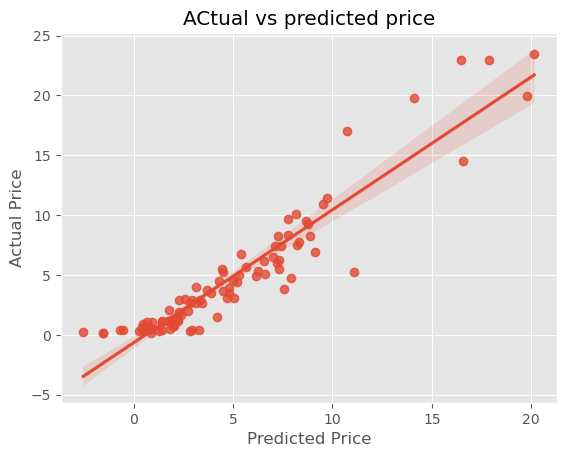

In [28]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()